### Homework assignment for clinical NLP

(1) Regular Expressions. Complete first 8 “lessons” at https://regexone.com/

(2) Propose a simple way of finding negations in a sentence using regular expressions.  
Your regular expression should make use of the | and * symbols.

In [2]:
import re

from sklearn.datasets import fetch_20newsgroups
news = fetch_20newsgroups(subset='train',
                          categories=('rec.autos',
                             'rec.motorcycles',
                             'rec.sport.baseball',
                             'rec.sport.hockey'),
                          remove=('headers', 'footers', 'quotes'))

In [3]:
some_text = '\n'.join(news.data[:1000])
no = re.findall(r'no[r|t]*\s+', some_text)
print (no[:10])

['not ', 'not ', 'not ', 'not ', 'not ', 'no ', 'not ', 'not ', 'not ', 'not ']


(3) Use NLTK to tokenize, stem, POS tag, and find named entities in 
“Fx of obesity but no fx of coronary artery diseases.”  
What named entities are in this sentence? What named entities does NLTK recognize? 
Use NLTK to plot the parse tree returned by 

['which', 'Fx', 'of', 'obes', 'but', 'no', 'fx', 'of', 'coronari', 'arteri', 'diseas']
[('Which', 'JJ'), ('Fx', 'NNP'), ('of', 'IN'), ('obesity', 'NN'), ('but', 'CC'), ('no', 'DT'), ('fx', 'NN'), ('of', 'IN'), ('coronary', 'JJ'), ('artery', 'NN'), ('disease', 'NN')]
(S
  (PERSON Which/JJ Fx/NNP)
  of/IN
  obesity/NN
  but/CC
  no/DT
  fx/NN
  of/IN
  coronary/JJ
  artery/NN
  disease/NN)


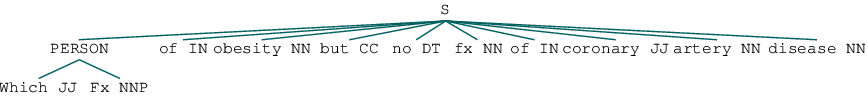

In [31]:
import nltk
import os

s = "Which Fx of obesity but no fx of coronary artery disease"
tokens = nltk.word_tokenize(s)
print ([nltk.PorterStemmer().stem(t) for t in tokens])

print (nltk.pos_tag(tokens))

print (nltk.ne_chunk(nltk.pos_tag(tokens), binary=False))

sentence = nltk.ne_chunk(nltk.pos_tag(tokens))

import os
from IPython.core.display import display
os.environ['PATH'] += os.pathsep + '/usr/local/Cellar/ghostscript/9.20/bin'
sentence

(4) Give several tokens with the “WDT” POS tag

In [32]:
import nltk
print (nltk.help.upenn_tagset('WDT'))

s = "which Fx of obesity but no fx of coronary artery disease"
tokens = nltk.word_tokenize(s)

print ([nltk.PorterStemmer().stem(t) for t in tokens])

print (nltk.pos_tag(tokens))

print (nltk.ne_chunk(nltk.pos_tag(tokens), binary=False))

WDT: WH-determiner
    that what whatever which whichever
None
['which', 'Fx', 'of', 'obes', 'but', 'no', 'fx', 'of', 'coronari', 'arteri', 'diseas']
[('which', 'WDT'), ('Fx', 'NNP'), ('of', 'IN'), ('obesity', 'NN'), ('but', 'CC'), ('no', 'DT'), ('fx', 'NN'), ('of', 'IN'), ('coronary', 'JJ'), ('artery', 'NN'), ('disease', 'NN')]
(S
  which/WDT
  Fx/NNP
  of/IN
  obesity/NN
  but/CC
  no/DT
  fx/NN
  of/IN
  coronary/JJ
  artery/NN
  disease/NN)


(5) Create a dispersion plot of "moon, earth, sun, mars" in the 'sci.space' category of 20 newsgroups.

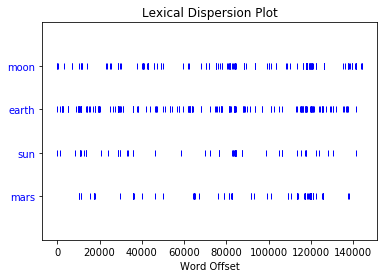

In [59]:
import itertools

from nltk.tokenize import sent_tokenize, word_tokenize

from sklearn.datasets import fetch_20newsgroups
science = ['sci.space']
science_news = fetch_20newsgroups(subset='train', categories=sci, 
                                  remove=('headers', 'footers', 'quotes'))

tokens = list()
for doc in science_news.data:
 sents = nltk.sent_tokenize(doc)
 for i, s in enumerate(sents):
    tokens.append(nltk.word_tokenize(s))

all_tokens = list(itertools.chain.from_iterable(tokens))

normalized_tokens = [t.lower() for t in all_tokens]

text_tokens = nltk.Text(normalized_tokens)
text_tokens.dispersion_plot(['moon','earth','sun','mars'])

(6) Write a tag pattern to cover noun phrases that contain gerunds, 
e.g. "the/DT receiving/VBG end/NN", "assistant/NN managing/VBG editor/NN". 
Add these patterns to the grammar, one per line. 
Test your work using some tagged sentences of your own devising.

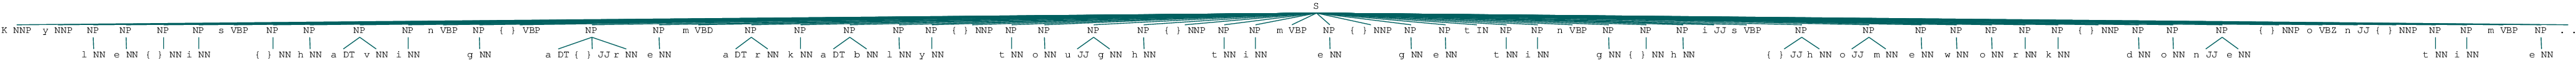

In [61]:
import os
from IPython.core.display import display
os.environ['PATH'] += os.pathsep + '/usr/local/Cellar/ghostscript/9.20/bin'

grammar= r"""
verbies: {<DT>?<NN>?<VBG><NN>}
NP: {<DT|PP\$>?<JJ>*<NN>} """

cp = nltk.RegexpParser(grammar)

chunkers = nltk.ne_chunk(nltk.pos_tag("Kyle is having a remarkably tough time getting his homework done on time."))

display(cp.parse(chunkers))

(7) Use the function nltk.ne_chunk_sents to find top 10 most common named entities in the 'sci.med' category of 20 newsgroups.

In [55]:
from nltk import FreqDist
f = FreqDist(text_tokens)
f.most_common(10)

[('the', 6298),
 (',', 6115),
 ('.', 5567),
 ('of', 2964),
 ('to', 2836),
 ('and', 2594),
 ('a', 2535),
 (')', 2037),
 ('(', 1933),
 ('in', 1811)]

(8) Look at http://scikit-learn.org/stable/modules/feature_extraction.html

Start by initializing ngram_vectorizer = CountVectorizer(analyzer='char_wb', ngram_range=(2, 2), min_df=1)

- Apply this to “Fx of obesity but no fx of coronary artery diseases.” 
- How many features are there?
- How many features do you get with setting ngram_range=(2, 5)?

In [54]:
from sklearn.feature_extraction.text import CountVectorizer
s = "Fx of obesity but no fx of coronary artery diseases."
ngram_vectorizer = CountVectorizer(analyzer='char_wb', ngram_range=(2, 2), min_df=1)
x = ngram_vectorizer.fit_transform([s])
print (len(ngram_vectorizer.get_feature_names()))

ngram_vectorizer = CountVectorizer(analyzer='char_wb', ngram_range=(2, 5), min_df=1)
x = ngram_vectorizer.fit_transform([s])
print (len(ngram_vectorizer.get_feature_names()))

###there's no way this is right. but I have to move on. 

40
132


(9) Read article on Parsey McParseface:

https://www.washingtonpost.com/news/wonk/wp/2016/05/18/googles-new-artificial-intelligence-cant-understand-these-sentences-can-you/?utm_term=.cf835cf7e5fd

What is a garden-path sentence?  
Can Parsey McParseface help with pronoun resolution across sentences?

In [ ]:
# garden path sentences are a very silly way of using the english languge, that are confusing
# for both humans and computers alike. The structure of the sentence leaves makes the interpretation
# completely ambiguous open to multiple different interpretations. It almost seems unfair that
# we would make computers try and understand such sentences, but PMP can partially understand 
# some of these sentence types. A review on Quora pointed out that PMP could handle "the old
# man the boat" "while the man hunted the deer ran into the woods" "while anna dressed the baby
# played in the crib." but did not correctly interpret: "I convinced her children are noisy" 
# "the coach smiled at the player tossed the frisbee" "the cotton clothes are made up of grows
# in Mississippi."